## Handwritten digit classification

In [ ]:
pip install tensorflow

## Load MNIST dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


##  Data preprocessing (normalization)

In [ ]:
X_train, X_test = X_train/255., X_test/255
#print(X_train[0])

## Data visualization

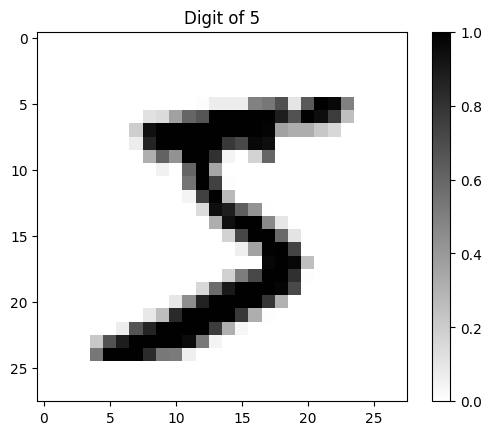

In [ ]:
import matplotlib.pyplot as plt

# plt.imshow(X_train[0], cmap='gray') # cmap: grayscaleDimage (blackground is black)
plt.imshow(X_train[0], cmap='gray_r') # gray_r: background is white
plt.colorbar() # Display a colored bar right next to an image
plt.title('Digit of {}'.format(y_train[0]))
plt.show()

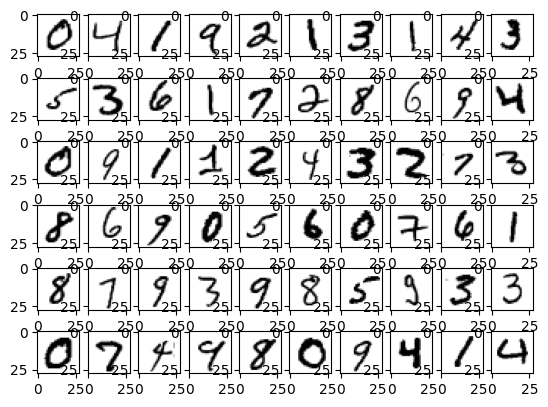

In [ ]:
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.imshow(X_train[index], cmap = 'gray_r')

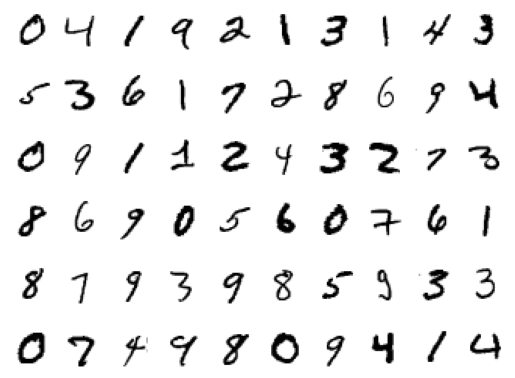

In [ ]:
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(X_train[index], cmap = 'gray_r')

## Least Squares

In [ ]:
from sklearn.linear_model import RidgeClassifier

Model_LS = RidgeClassifier()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
print(X_train.reshape(-1,28*28).shape)

(60000, 784)


In [ ]:
# training
Model_LS.fit(X_train.reshape(-1, 28*28), y_train)

RidgeClassifier()

In [ ]:
# prediction on test data
Model_LS.predict(X_test[0].reshape(1, -1))

array([7], dtype=uint8)

In [ ]:
# evaluate test accuracy
Model_LS.score(X_test.reshape(-1, 28*28), y_test)


0.8604

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [16]:
Model_LR = LogisticRegression()
Model_LR = LogisticRegression(max_iter=1000)


# training
Model_LR.fit(X_train.reshape(-1, 28*28), y_train)

# prediction on test data
Model_LR.predict(X_test[0].reshape(1,-1))

# evaluate test accuracy
Model_LR.score(X_test.reshape(-1, 28*28), y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9258

## Deep learning

In [17]:
from tensorflow.keras.models import Sequential

Model_NN = Sequential()

In [18]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Model_NN.add(Flatten(input_shape=(28,28)))
Model_NN.add(Dense(128, activation='relu'))
Model_NN.add(Dense(10, activation='softmax'))
Model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [19]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-2,
           beta_1 = 0.9,
           beta_2 = 0.999)

Model_NN.compile(optimizer=opt,
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])
#Model_NN.compile(optimizer=opt,
#                 loss='sparse_categorical_crossentropy')


In [20]:
#training
hist = Model_NN.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2348 - acc: 0.9310
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1642 - acc: 0.9554
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1444 - acc: 0.9603
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1309 - acc: 0.9648
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1219 - acc: 0.9677
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1172 - acc: 0.9708
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1109 - acc: 0.9718
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1065 - acc: 0.9740
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1022 - acc: 0.9750
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0995 - acc: 0.9762
Epoch 11/20
1875/1875 [======

In [21]:
type(hist.history)

dict

In [22]:
print(hist.history)

{'loss': [0.23479589819908142, 0.16422101855278015, 0.14439265429973602, 0.13093164563179016, 0.12186770886182785, 0.11721405386924744, 0.11090714484453201, 0.10654691606760025, 0.10223831981420517, 0.09946515411138535, 0.09792514145374298, 0.0902121439576149, 0.08711665868759155, 0.09046206623315811, 0.08556125313043594, 0.08601405471563339, 0.08949429541826248, 0.08513195067644119, 0.08325152844190598, 0.07460225373506546], 'acc': [0.9309999942779541, 0.9554499983787537, 0.960349977016449, 0.964816689491272, 0.9676833152770996, 0.9707833528518677, 0.971750020980835, 0.9739500284194946, 0.9749833345413208, 0.9762333035469055, 0.9770500063896179, 0.9786499738693237, 0.9797833561897278, 0.9798333048820496, 0.9801499843597412, 0.9816833138465881, 0.9814666509628296, 0.9816499948501587, 0.9818000197410583, 0.9844499826431274]}


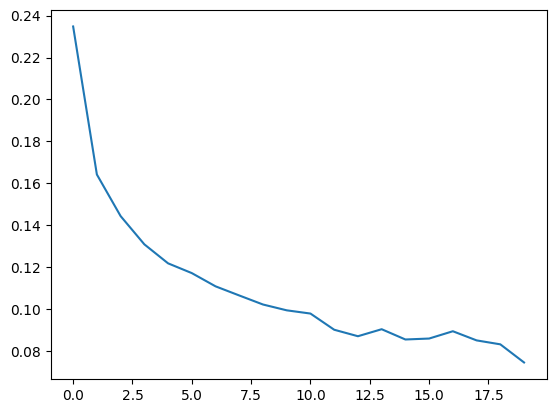

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

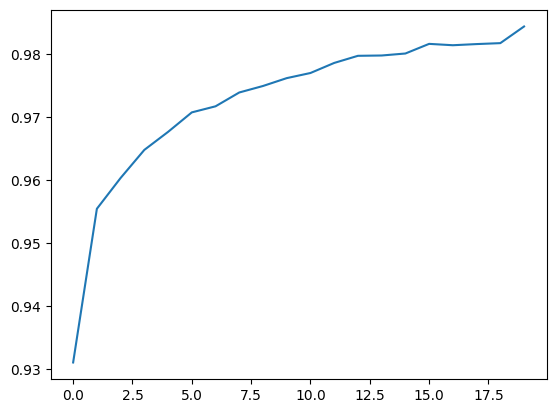

In [24]:
plt.plot(hist.history['acc'])
plt.show()

In [25]:
Model_NN.predict(X_test[0].reshape(1,28,28)).argmax(1)

1/1 [==============================] - 0s 157ms/step


array([7])

In [26]:
# evaluation (loss & accuracy)

Model_NN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3236 - acc: 0.9669


[0.32358518242836, 0.9668999910354614]